<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Ai_edu_practical_ML/blob/week_13_clustering/PML_Hometask_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [3]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [4]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [5]:
ratings.drop('user', inplace=True)

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

In [6]:
ratings.shape

(1000, 5000)

Заполните пропуски нулями.

In [7]:
ratings.fillna(0, inplace=True)

Нормализуйте данные при помощи `normalize`.

In [8]:
from sklearn.preprocessing import normalize

df = normalize(ratings)

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)

km.fit(df)
# Предсказываем кластеры для данных
clusters = km.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Выведите на экран центры кластеров (центроиды)

In [11]:
# Выводим центроиды кластеров
centroids = km.cluster_centers_
len(centroids)

5

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [18]:
# # Функция для вычисления косинусной меры между вектором и центроидом
# def cosine_distance(vector, centroid):
#     return cosine(vector, centroid)

In [14]:
from scipy import spatial

# ваш код здесь

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [12]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [15]:
# Пример использования функции для первого кластера
cluster_0_points = df[clusters == 0]
top_10_cluster_0 = pClosest(cluster_0_points, centroids[0])
print(top_10_cluster_0)

[3, 7, 22, 4, 0, 10, 1, 30, 14, 20]


In [16]:
# Вычисление расстояния между "the beatles" и "coldplay"
beatles_index = ratings.index.get_loc('the beatles')
coldplay_index = ratings.index.get_loc('coldplay')

distance = spatial.distance.cosine(df[beatles_index], df[coldplay_index])
print(f"Расстояние между 'the beatles' и 'coldplay': {distance:.2f}")

Расстояние между 'the beatles' и 'coldplay': 0.90


## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

In [18]:
def pClosest(points, pt, K=10):
    # Вычисляем косинусное расстояние между рейтингом исполнителя и центройдом
    distances = []
    for i, point in enumerate(points):
        distance = spatial.distance.cosine(point, pt)
        distances.append((i, distance))

    # Сортируем индексы точек по этим расстояниям
    sorted_indices = []
    for item in sorted(distances, key=lambda x: x[1]):
        sorted_indices.append(item[0])

    # Возвращаем первые K индексов, которые соответствуют ближайшим точкам
    return sorted_indices[:K]

# Список названий исполнителей, соответствующих каждой точке
artists = ratings.index

# Список центройдов для каждого кластера
centroids = km.cluster_centers_

# пройдем по центройдам каждого кластера по циклу
for cluster_id, centroid in enumerate(centroids):


    # Найдем индексы ближайших исполнителей к центройду кластера
    closest_indices = pClosest(ratings.values, centroid)

    # Найдем имена исполнителей для полученных 10 исполнителей
    closest_artists = [artists[idx] for idx in closest_indices]

    # Выведем на печать
    print(f"Кластер {cluster_id}:")
    print("Топ-10 ближайших исполнителей:")
    for rank, artist in enumerate(closest_artists):
        print(f"{rank + 1}. {artist}")
    print('-'*100)

Кластер 0:
Топ-10 ближайших исполнителей:
1. sufjan stevens
2. the arcade fire
3. broken social scene
4. the shins
5. radiohead
6. belle and sebastian
7. deathcab for cutie
8. beirut
9. of montreal
10. andrew bird
----------------------------------------------------------------------------------------------------
Кластер 1:
Топ-10 ближайших исполнителей:
1. jay-z
2. kanye west
3. nas
4. lupe the gorilla
5. lil' wayne
6. the game
7. the roots featuring d'angelo
8. t.i.
9. mos def
10. little brother
----------------------------------------------------------------------------------------------------
Кластер 2:
Топ-10 ближайших исполнителей:
1. metallica
2. radiohead
3. tool
4. system of a down
5. niИ
6. the beatles
7. led zeppelin.
8. koЯn
9. red hot clili peppers
10. pink fluid
----------------------------------------------------------------------------------------------------
Кластер 3:
Топ-10 ближайших исполнителей:
1. fall out boy
2. paramore
3. the all-americian rejects
4. blink-182


# Часть 2: сравнение алгоритмов кластеризации

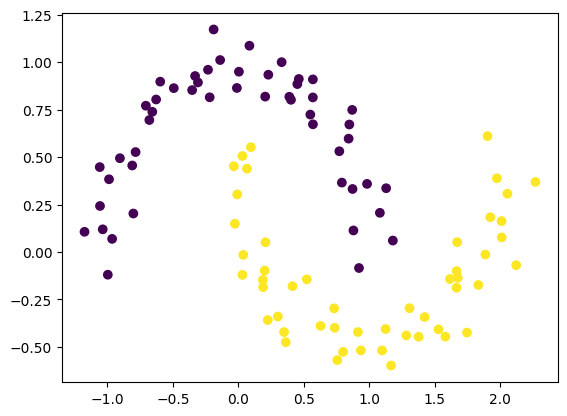

In [19]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans execution time: 0.0394 seconds


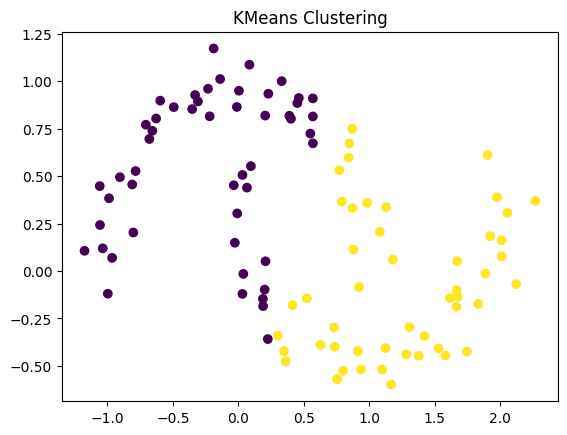

In [21]:
# ваш код здесь
import time

# Применение KMeans и замер времени работы
start_time = time.time()

# Инициализация и обучение модели KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Время выполнения
end_time = time.time()
execution_time = end_time - start_time
print(f"KMeans execution time: {execution_time:.4f} seconds")

# Предсказание кластеров
y_kmeans = kmeans.predict(X)

# Визуализация результатов KMeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.title('KMeans Clustering')
plt.show()

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

In [24]:
# ваш код здесь

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps: 0.1, min_samples: 4, silhouette_score: -0.3099
eps: 0.2, min_samples: 4, silhouette_score: 0.3110
eps: 0.2, min_samples: 5, silhouette_score: 0.3205
eps: 0.2, min_samples: 6, silhouette_score: 0.0752
eps: 0.2, min_samples: 7, silhouette_score: -0.0099
eps: 0.28, min_samples: 4, silhouette_score: 0.3075
eps: 0.28, min_samples: 5, silhouette_score: 0.3075
eps: 0.28, min_samples: 6, silhouette_score: -0.0218
eps: 0.28, min_samples: 7, silhouette_score: 0.2013
eps: 0.3, min_samples: 6, silhouette_score: 0.3841
eps: 0.3, min_samples: 7, silhouette_score: 0.2154
eps: 0.32, min_samples: 7, silhouette_score: -0.0449
Best parameters: {'eps': 0.3, 'min_samples': 6}, Best silhouette_score: 0.3841


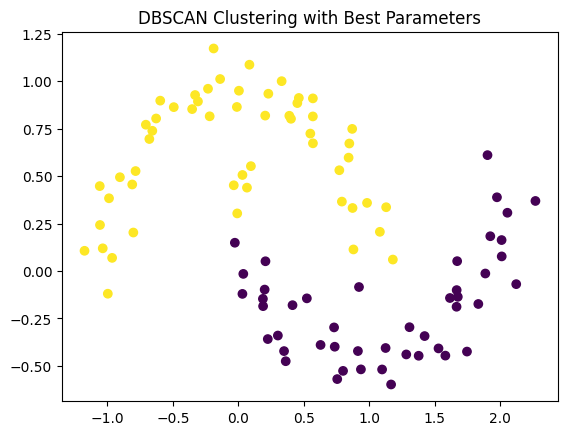

In [25]:
# Диапазоны гиперпараметров
eps_values = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
min_samples_values = [4, 5, 6, 7]

best_score = -1
best_params = {}

# Перебор гиперпараметров
for eps in eps_values:
    for min_samples in min_samples_values:
        # Инициализация и обучение модели DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)

        # Если найдены кластеры (не все точки помечены как шум)
        if len(set(clusters)) > 1:
            # Вычисление силуэта
            score = silhouette_score(X, clusters)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette_score: {score:.4f}")

            # Обновление лучших параметров
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Вывод лучших параметров
print(f"Best parameters: {best_params}, Best silhouette_score: {best_score:.4f}")

# Применение DBSCAN с лучшими параметрами
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_clusters = best_dbscan.fit_predict(X)

# Визуализация результатов DBSCAN с лучшими параметрами
plt.scatter(X[:, 0], X[:, 1], c=best_clusters)
plt.title('DBSCAN Clustering with Best Parameters')
plt.show()

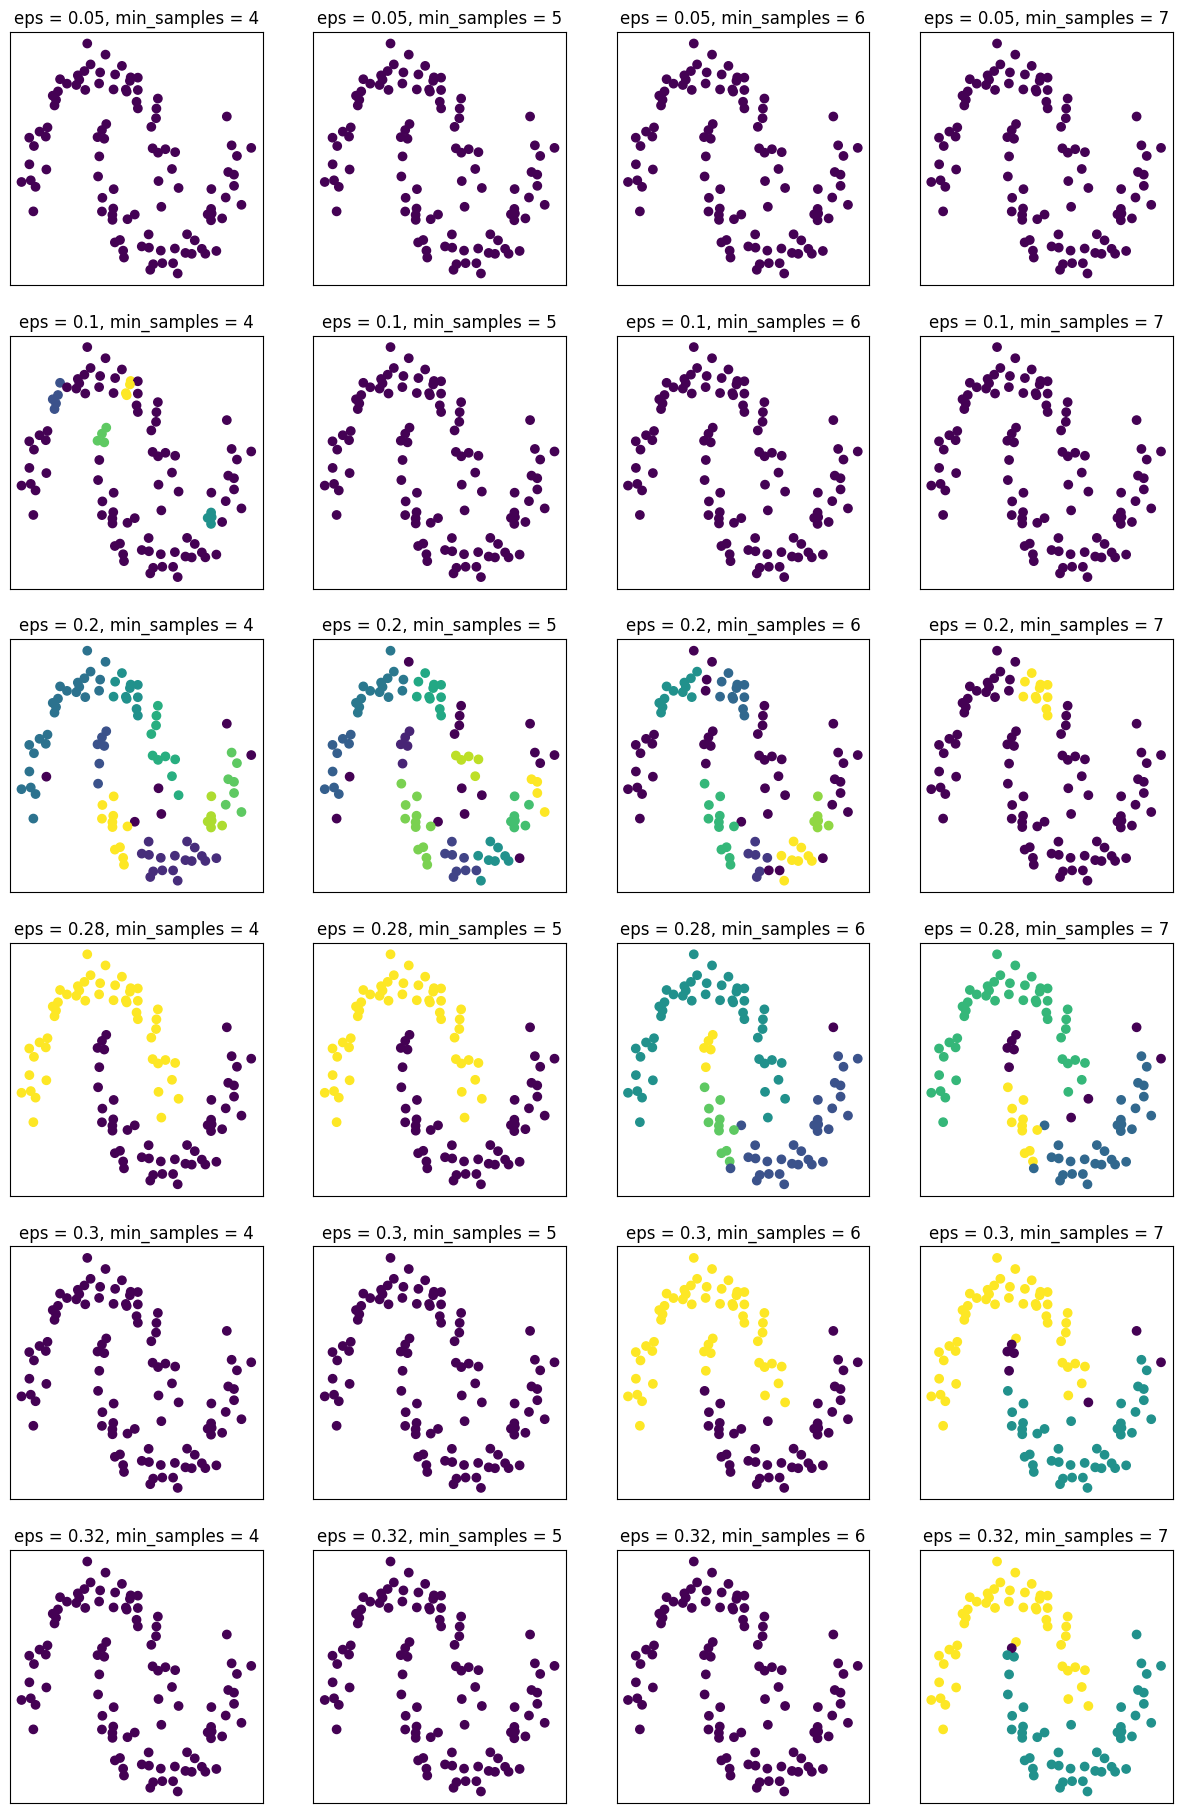

In [26]:
min_samples = [4, 5, 6, 7]
eps = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]

fig, ax = plt.subplots(len(eps), len(min_samples),  figsize=(15,23))
for j, samples in enumerate(min_samples):
    for i, e in enumerate(eps):
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        ax[i][j].set_title('eps = {}, min_samples = {}'.format(e, samples))
        ax[i][j].scatter(X[:,0], X[:,1], c = clusters)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

plt.show()

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [28]:
from sklearn.cluster import AgglomerativeClustering

# ваш код здесь

linkage: ward, silhouette_score: 0.4412
linkage: complete, silhouette_score: 0.4677
linkage: average, silhouette_score: 0.4677
linkage: single, silhouette_score: 0.3075
Best parameters: {'linkage': 'complete'}, Best silhouette_score: 0.4677


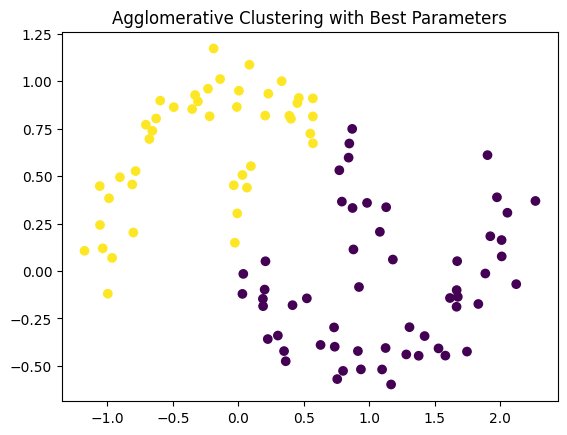

In [29]:
# Диапазон гиперпараметров
linkage_values = ['ward', 'complete', 'average', 'single']

best_score = -1
best_params = {}

# Перебор гиперпараметров
for linkage in linkage_values:
    # Инициализация и обучение модели AgglomerativeClustering
    agg_clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    clusters = agg_clustering.fit_predict(X)

    # Вычисление силуэта
    score = silhouette_score(X, clusters)
    print(f"linkage: {linkage}, silhouette_score: {score:.4f}")

    # Обновление лучших параметров
    if score > best_score:
        best_score = score
        best_params = {'linkage': linkage}

# Вывод лучших параметров
print(f"Best parameters: {best_params}, Best silhouette_score: {best_score:.4f}")

# Применение AgglomerativeClustering с лучшими параметрами
best_agg_clustering = AgglomerativeClustering(n_clusters=2, linkage=best_params['linkage'])
best_clusters = best_agg_clustering.fit_predict(X)

# Визуализация результатов AgglomerativeClustering с лучшими параметрами
plt.scatter(X[:, 0], X[:, 1], c=best_clusters)
plt.title('Agglomerative Clustering with Best Parameters')
plt.show()

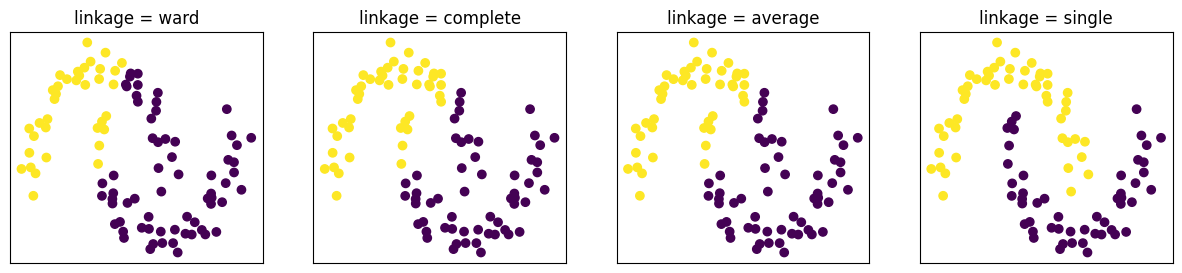

In [30]:
linkages =  ['ward', 'complete', 'average', 'single']


fig, ax = plt.subplots(1, len(linkages),  figsize=(15,3))
for i, linkage in enumerate(linkages):

    aggcluster = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    clusters = aggcluster.fit_predict(X)

    ax[i].set_title('linkage = {}'.format(linkage))
    ax[i].scatter(X[:,0], X[:,1], c = clusters)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

In [32]:
from sklearn.cluster import SpectralClustering

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_neighbors: 1, silhouette_score: -0.0106
n_neighbors: 2, silhouette_score: 0.0434
n_neighbors: 3, silhouette_score: 0.1303
n_neighbors: 4, silhouette_score: 0.4117
n_neighbors: 5, silhouette_score: 0.3203
n_neighbors: 6, silhouette_score: 0.4421
n_neighbors: 7, silhouette_score: 0.4611
n_neighbors: 8, silhouette_score: 0.4611
n_neighbors: 9, silhouette_score: 0.4469
n_neighbors: 10, silhouette_score: 0.4642
n_neighbors: 11, silhouette_score: 0.4606
n_neighbors: 12, silhouette_score: 0.4514
n_neighbors: 13, silhouette_score: 0.4606
n_neighbors: 14, silhouette_score: 0.4514
n_neighbors: 15, silhouette_score: 0.4536
n_neighbors: 16, silhouette_score: 0.4562
n_neighbors: 17, silhouette_score: 0.4501
n_neighbors: 18, silhouette_score: 0.4667
n_neighbors: 19, silhouette_score: 0.4667
Best parameters: {'n_neighbors': 18}, Best silhouette_score: 0.4667


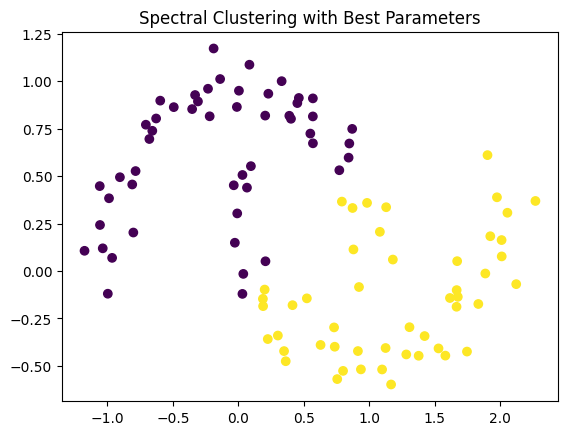

In [33]:
# ваш код здесь
# Диапазон гиперпараметров
n_neighbors_values = range(1, 20)

best_score = -1
best_params = {}

# Перебор гиперпараметров
for n_neighbors in n_neighbors_values:
    # Инициализация и обучение модели SpectralClustering
    spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=n_neighbors, random_state=42)
    clusters = spectral_clustering.fit_predict(X)

    # Вычисление силуэта
    score = silhouette_score(X, clusters)
    print(f"n_neighbors: {n_neighbors}, silhouette_score: {score:.4f}")

    # Обновление лучших параметров
    if score > best_score:
        best_score = score
        best_params = {'n_neighbors': n_neighbors}

# Вывод лучших параметров
print(f"Best parameters: {best_params}, Best silhouette_score: {best_score:.4f}")

# Применение SpectralClustering с лучшими параметрами
best_spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=best_params['n_neighbors'], random_state=42)
best_clusters = best_spectral_clustering.fit_predict(X)

# Визуализация результатов SpectralClustering с лучшими параметрами
plt.scatter(X[:, 0], X[:, 1], c=best_clusters)
plt.title('Spectral Clustering with Best Parameters')
plt.show()

In [35]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


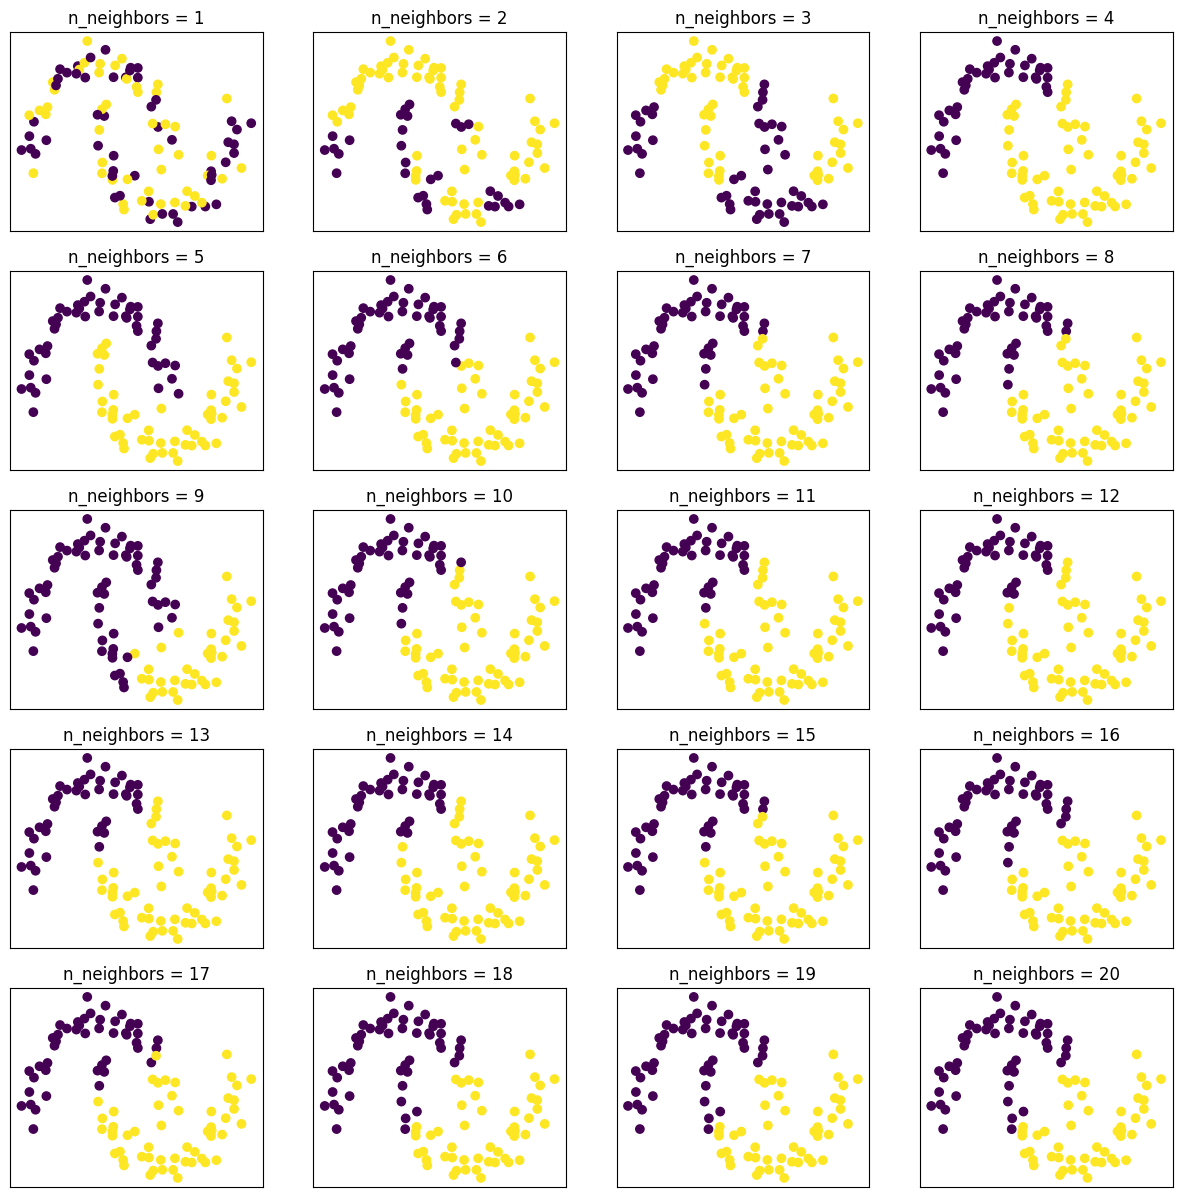

In [36]:
n = 20

fig, ax = plt.subplots(int(np.ceil(n/4)), 4,  figsize=(15,15))
for i, n_neighbors in enumerate(range(1, n+1)):
    row = i // 4
    col = i % 4
    spectcluster = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                                     random_state=42, n_neighbors=n_neighbors)
    clusters = spectcluster.fit_predict(X)

    ax[row, col].set_title('n_neighbors = {}'.format(n_neighbors))
    ax[row, col].scatter(X[:,0], X[:,1], c = clusters)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

plt.show()

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?